# Data Science & Machine Learning Project on Dating Profiles


Welcome to one of my most ambitious Data Science and Machine Learning project I made! In this journey, I dive deep into a fascinating dataset of dating profiles to uncover patterns in user characteristics, behaviors, and preferences. Beyond just crunching numbers and training models, my goal is to tell a compelling story hidden within the data: bringing insights to life through visualization, exploration, and predictive modeling. This project is a showcase to many things and insights I’ve learned so far, blending technical expertise with curiosity-driven analysis. With much love, I hope you enjoy it as I did.

---

## Project Workflow

Our analysis follows an end-to-end workflow that includes the following key steps:

1. **Data Ingestion and Overview**
   - **Objective:** Load the dataset and gain an initial understanding of its structure.
   - **Tasks:** Examine dataset dimensions, review column types, and identify potential quality issues.

2. **Data Cleaning & Feature Engineering (ETL/ELT)**
   - **Objective:** Prepare and transform the raw data into a clean, analysis-ready format.
   - **Tasks:** 
     - Handle missing values and outliers.
     - Clean and standardize textual fields (e.g., zodiac signs, religious affiliations).
     - Encode categorical variables into numerical representations.

3. **Exploratory Data Analysis (EDA)**
   - **Objective:** Visualize and understand the underlying patterns and relationships within the data.
   - **Tasks:**
     - Generate histograms, count plots, and heatmaps to explore demographics (e.g., age, height, income).
     - Investigate relationships between features such as gender differences and lifestyle choices.
     - Uncover hidden trends and anomalies that may influence model performance.

4. **Machine Learning Modeling**
   - **Objective:** Build and compare predictive models to classify users based on their profile attributes.
   - **Tasks:**
     - Implement multiple algorithms including Logistic Regression, Decision Trees, and K-Nearest Neighbors.
     - Train models to predict a target variable (e.g., zodiac sign).
     - Compare model performance using various evaluation metrics.

5. **Evaluation & Conclusion**
   - **Objective:** Evaluate model performance and derive actionable insights.
   - **Tasks:**
     - Use classification reports, confusion matrices, and cross-validation to assess models.
     - Summarize key findings and provide recommendations for future work.
     - Reflect on the analysis process and suggest further improvements or studies.



## Project Goal

The primary goal of this project is to demonstrate a clear, reproducible approach to data science by showcasing skills in data ingestion, cleaning, visualization, feature engineering, and model comparison. Through this analysis, we aim to extract meaningful insights from the dating profiles dataset that could inform future research and practical applications in understanding human behavior.



*So... let's dive in and uncover the hidden stories within the data!*

---

#### Step 1: Import Libraries & Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") # Set Seaborn style for consistency

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#### Step 2: Data Ingestion & Initial Exploration
- Load the dataset
- Column names
- Dataset shape, total rows and columns

In [2]:
profiles = pd.read_csv('raw_data.csv', encoding='utf-8')
print("\nData Shape:", profiles.shape)
print("\nThe Columns including in this Dataset are:", list(profiles.columns))
display(profiles.head())


Data Shape: (59946, 31)

The Columns including in this Dataset are: ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


- Quick overview of a date field example (last_online)


In [3]:
print("Last online sample:")
display(profiles.last_online.head())

Last online sample:


0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

- Display null counts

In [4]:
print("Missing values per column:")
print(profiles.isnull().sum())

Missing values per column:
age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64


- Basic info regarding the Dataset
- Column Data types
- Some major statistics abput the data

In [5]:
print("\nPrint Basic head info", profiles.head()) 
print("\nPrint Info about the dataset", profiles.info())
print(profiles.describe())
print("\nPrint Column and Value Data types" , profiles.dtypes)


Print Basic head info    age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

  

### Step 3: Data Cleaning & Feature Engineering
- We will clean 'sign' column and extract the first word to clean up multiple tags
- Calculate number of people by each sign using value_counts()

In [6]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
print("Unique signs (raw):", profiles.sign.nunique())
print("Unique cleaned signs:", profiles.signsCleaned.nunique())
print("Value counts of cleaned signs:")
display(profiles.signsCleaned.value_counts())

Unique signs (raw): 48
Unique cleaned signs: 12
Value counts of cleaned signs:


signsCleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

- We clean religion by extracting the first word
- Using value_counts() we can get the total number of people for each religion profile

In [7]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
print("\nTotal Number of people by religion:", profiles['religionCleaned'].value_counts()) # LUEGO MODIFICAR PARA QUE APAREZAN EN ORDEN MAYOR A MENOR


Total Number of people by religion: religionCleaned
agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: count, dtype: int64


### Step 4: Exploratory Data Analysis (EDA)
- Visualizing the distribution of age overall and by gender

<Figure size 1200x500 with 0 Axes>

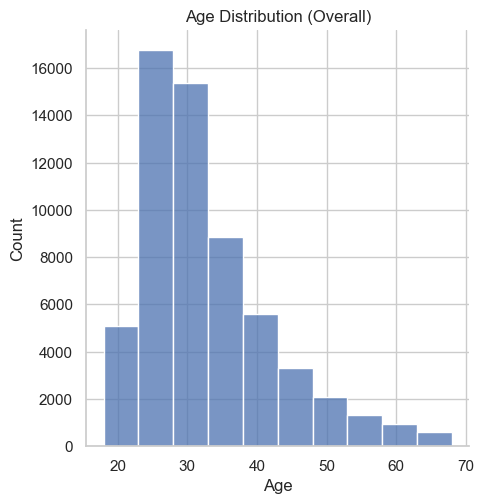

<Figure size 1200x500 with 0 Axes>

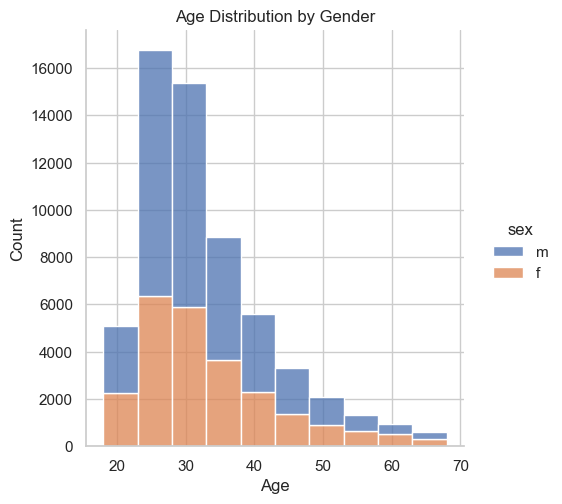

In [8]:
plt.figure(figsize=(12,5))
sns.displot(data=profiles, x="age", bins=range(18, 70, 5), kde=False)
plt.title("Age Distribution (Overall)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12,5))
sns.displot(data=profiles, x="age", hue="sex", bins=range(18, 70, 5), multiple="stack", kde=False)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

- Distribution of height overall and by gender

<Figure size 1200x800 with 0 Axes>

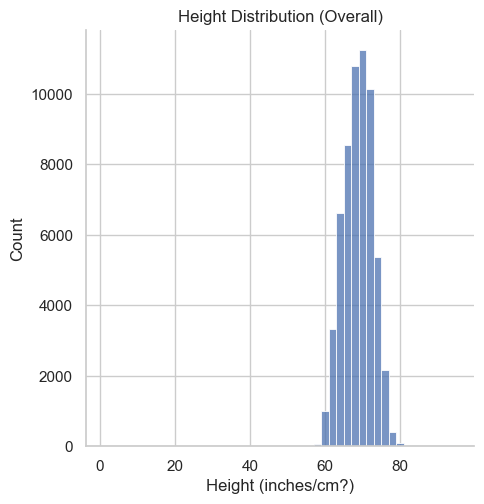

<Figure size 1200x800 with 0 Axes>

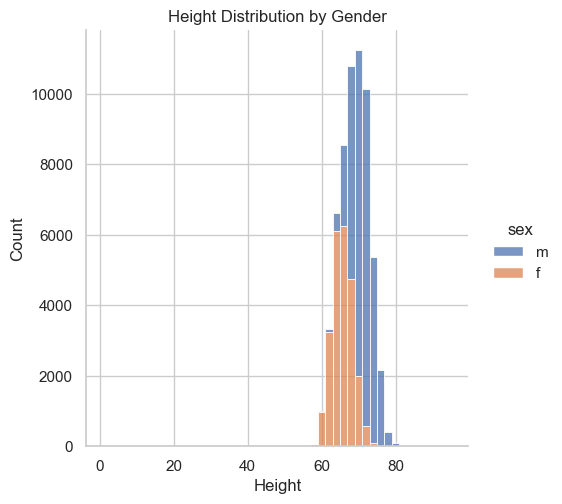

In [9]:
plt.figure(figsize=(12, 8))
sns.displot(data=profiles, x="height", binwidth=2, kde=False)
plt.title("Height Distribution (Overall)")
plt.xlabel("Height (inches/cm?)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 8))
sns.displot(data=profiles, x="height", hue="sex", binwidth=2, multiple="stack", kde=False)
plt.title("Height Distribution by Gender")
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

- Plot Income distribution by gender


<Figure size 1200x500 with 0 Axes>

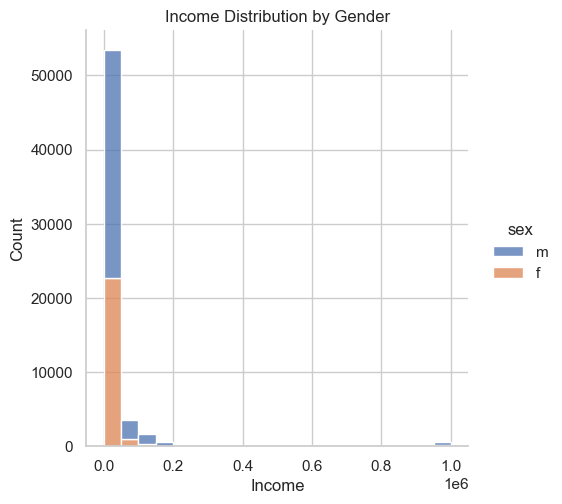

In [10]:
plt.figure(figsize=(12,5))
sns.displot(data=profiles, x="income", hue="sex", binwidth=50000, multiple="stack", kde=False)
plt.title("Income Distribution by Gender")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

- Count plots for several *categorical variables*

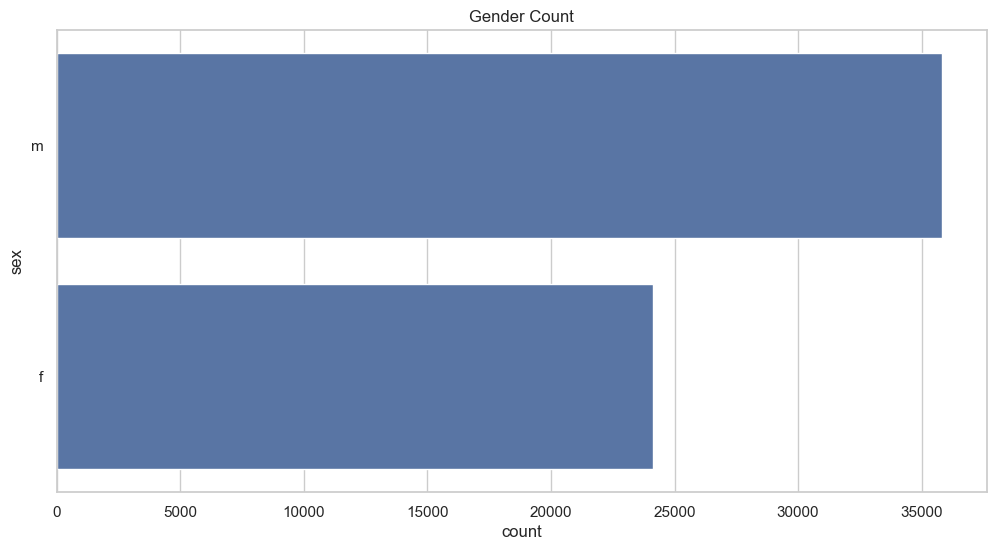

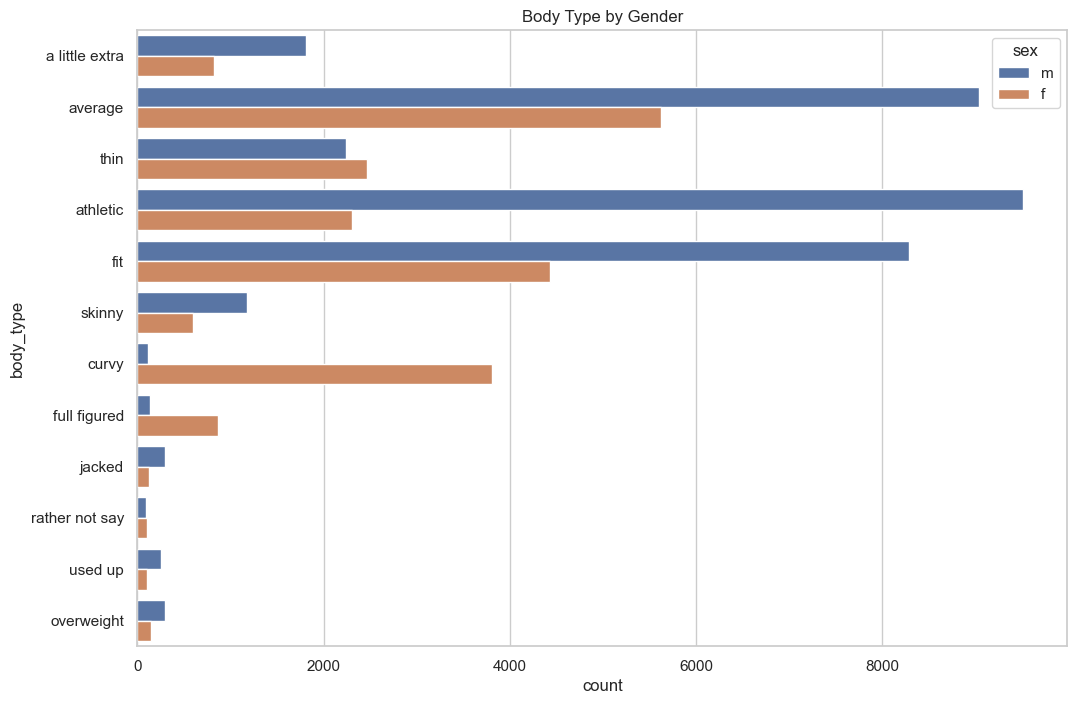

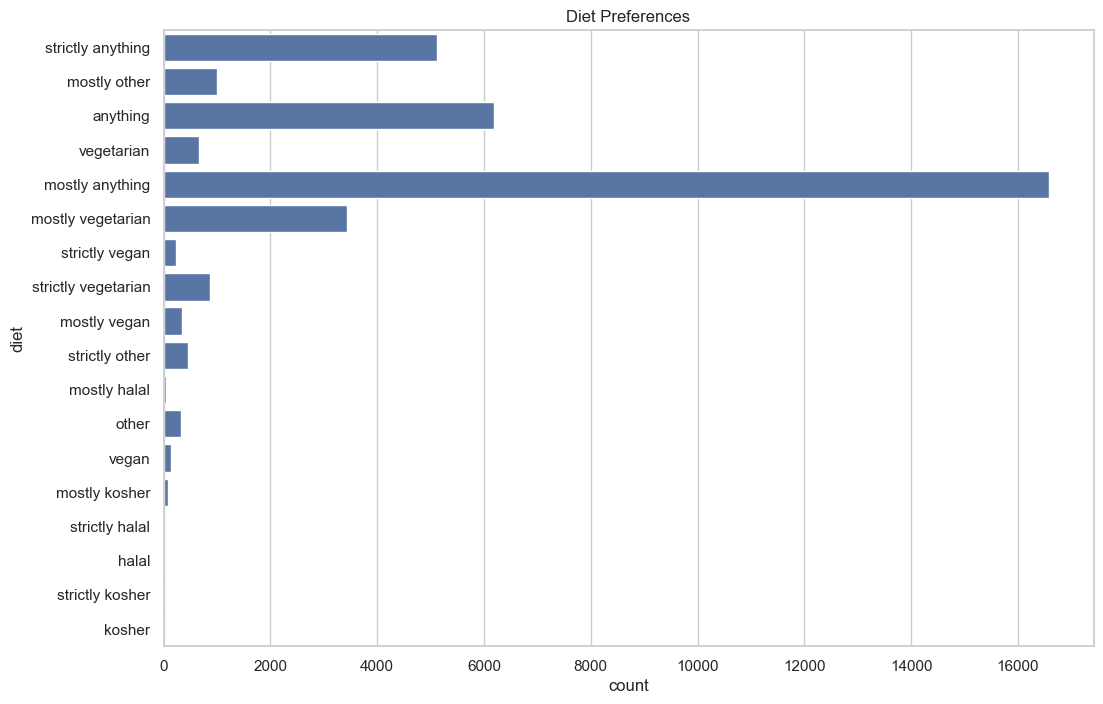

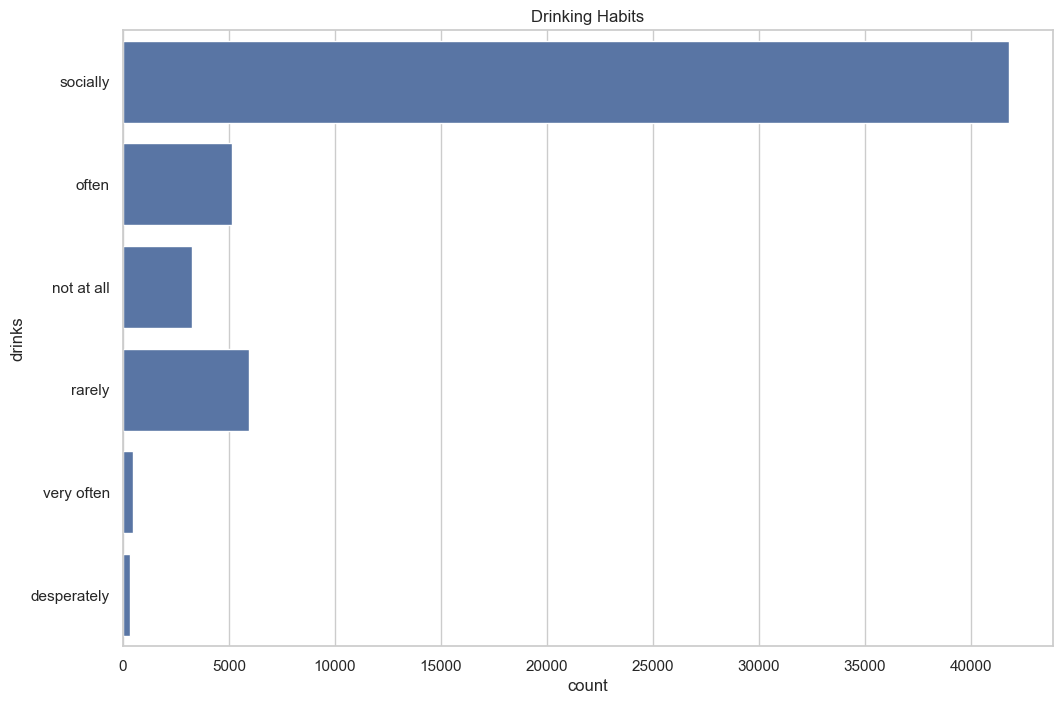

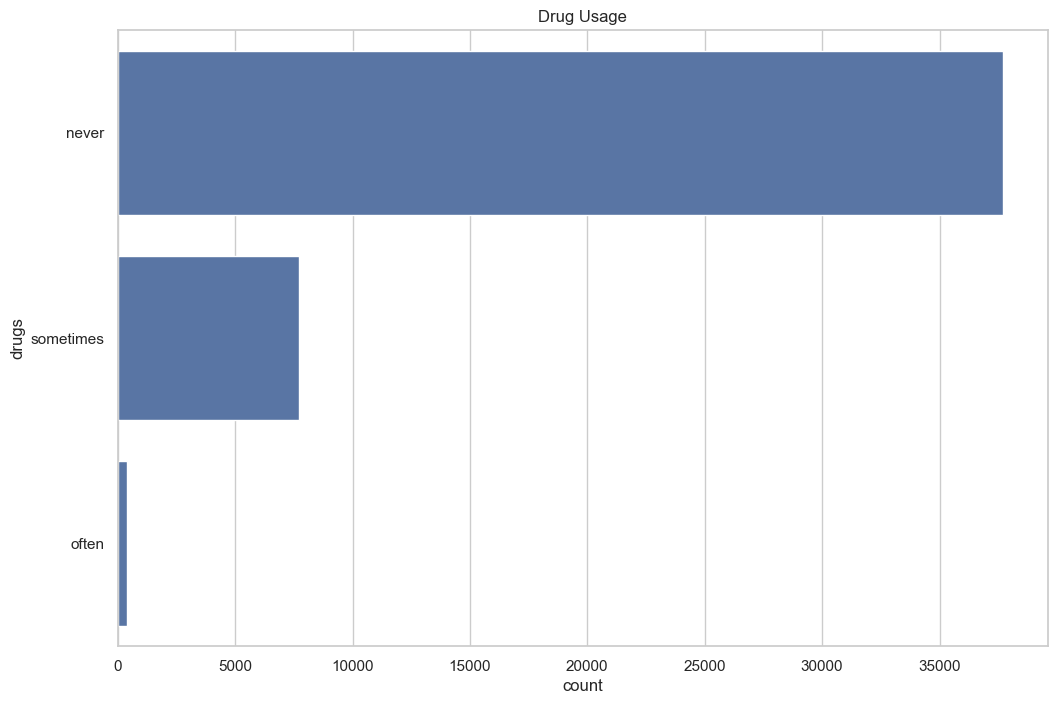

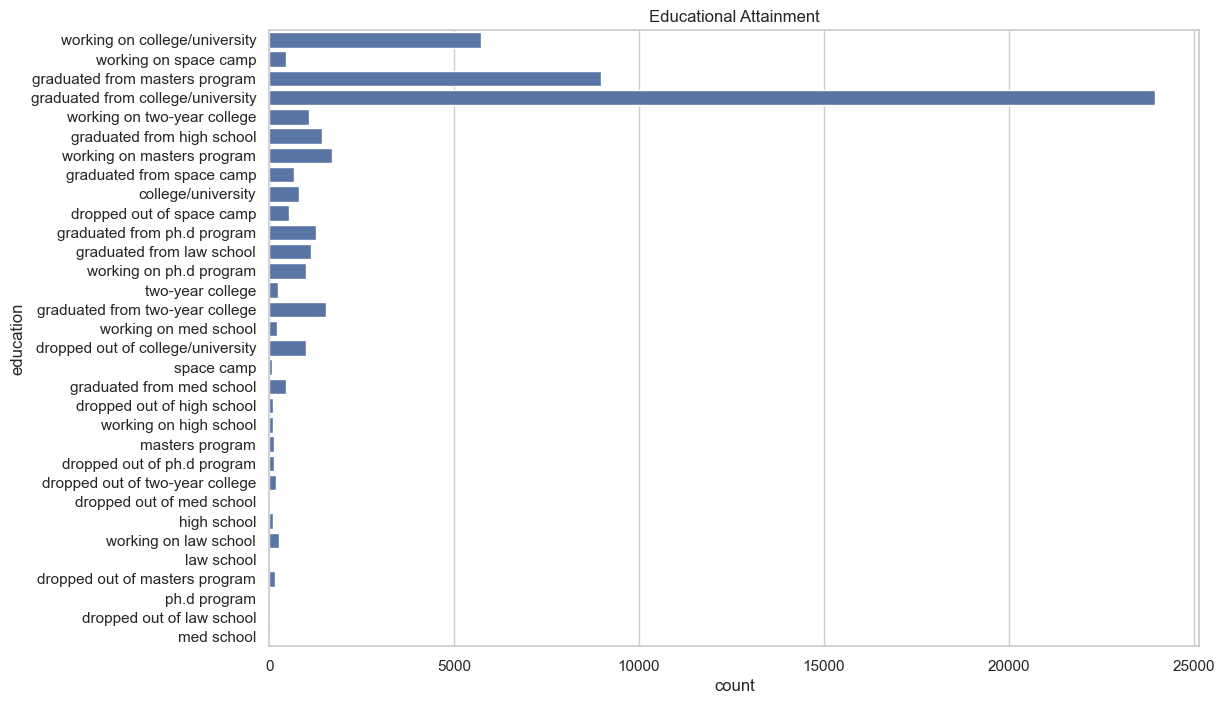

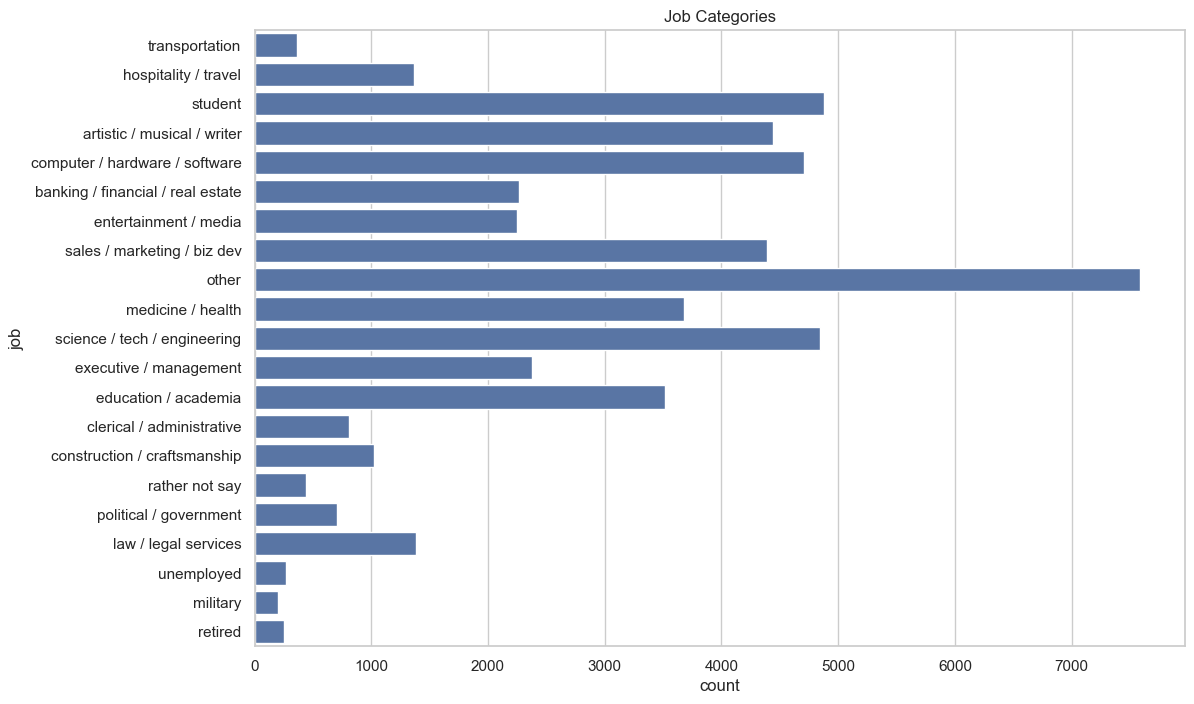

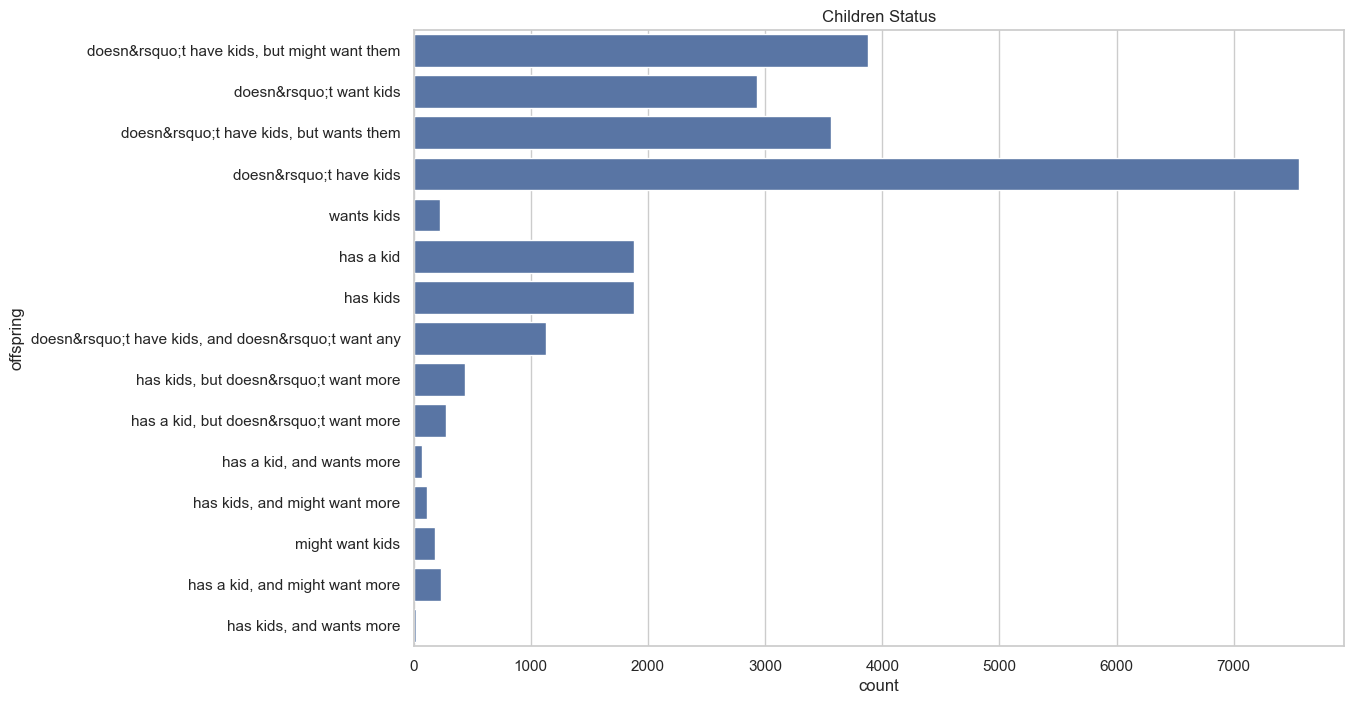

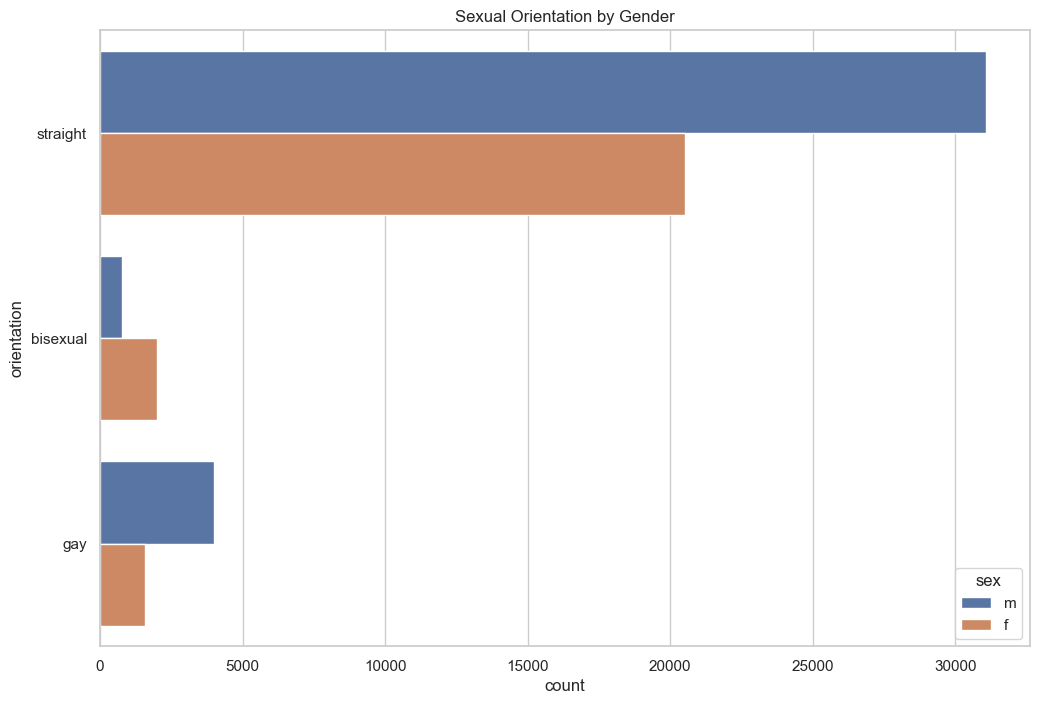

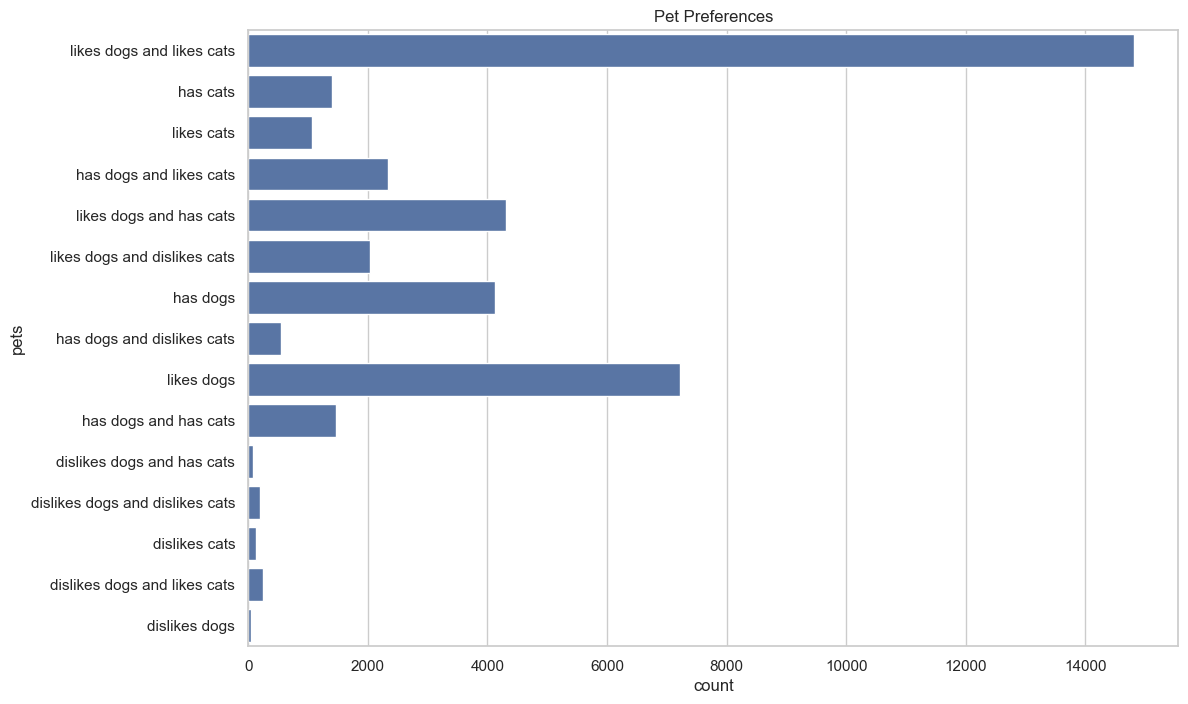

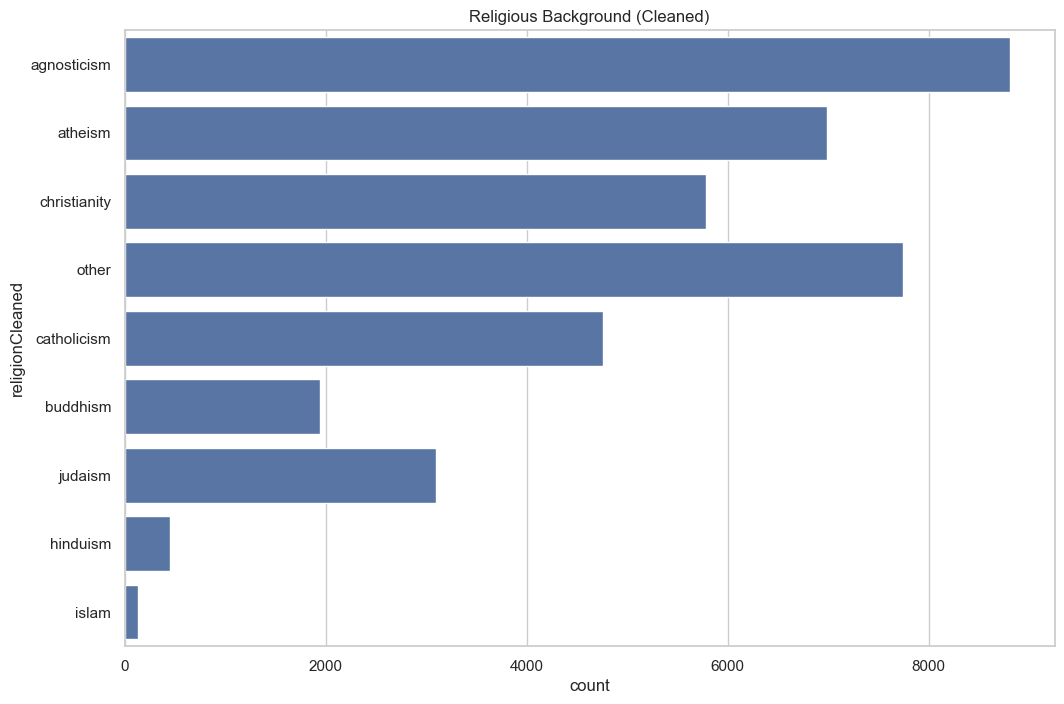

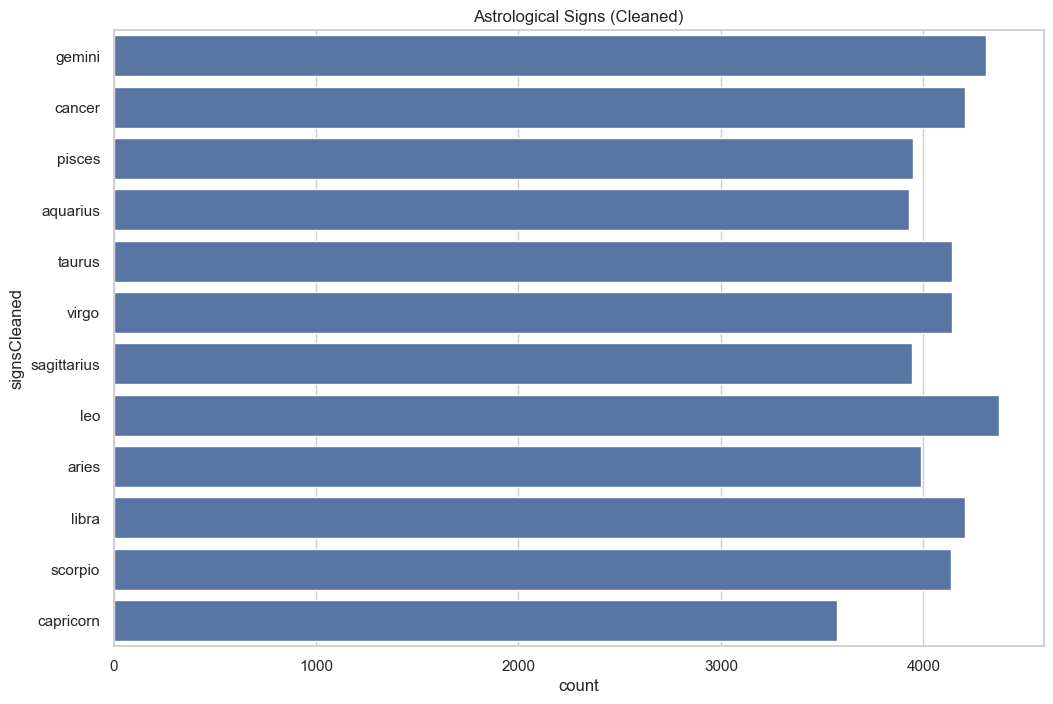

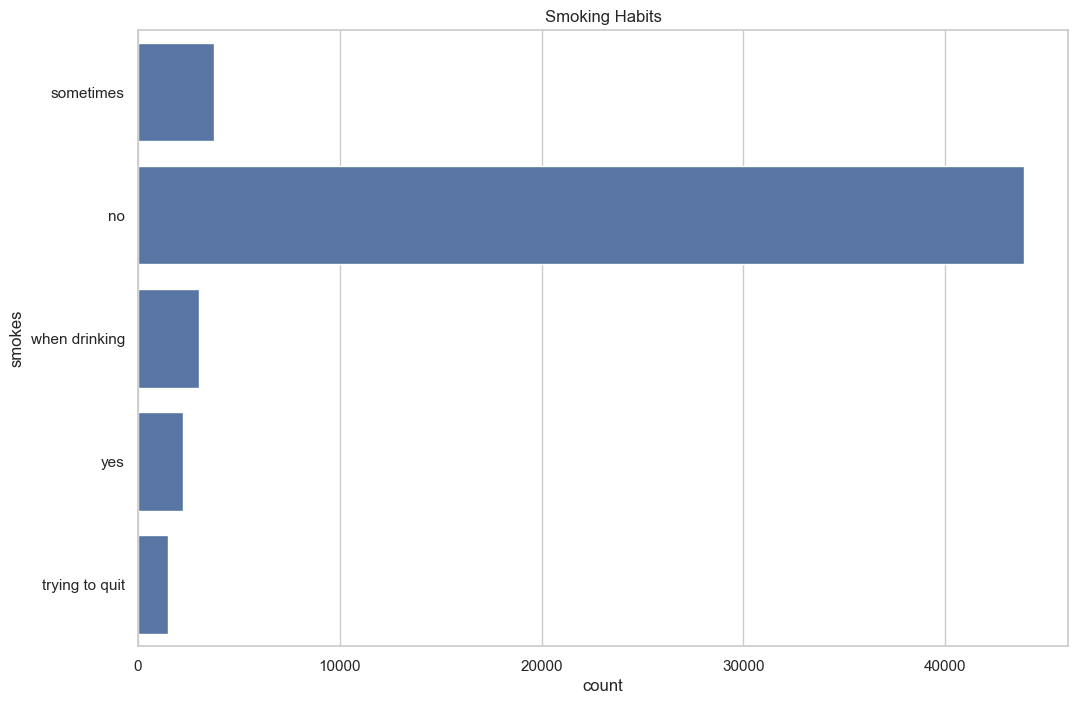

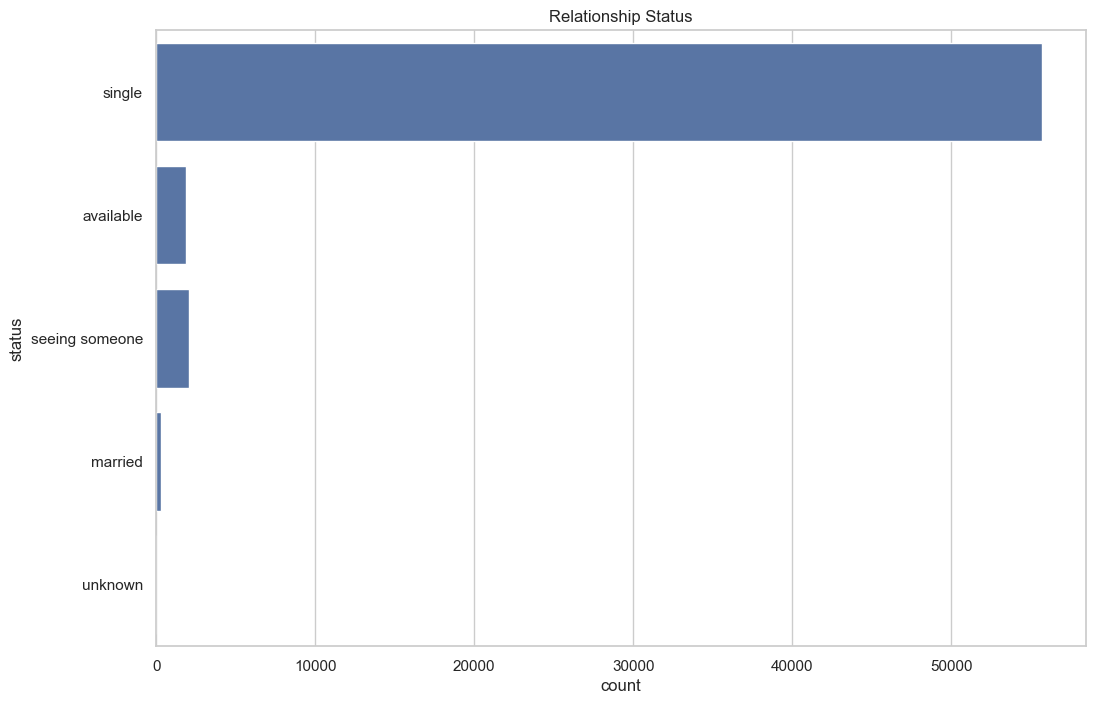

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=profiles, y="sex")
plt.title("Gender Count")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="body_type", hue="sex")
plt.title("Body Type by Gender")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="diet")
plt.title("Diet Preferences")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="drinks")
plt.title("Drinking Habits")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="drugs")
plt.title("Drug Usage")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="education")
plt.title("Educational Attainment")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="job")
plt.title("Job Categories")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="offspring")
plt.title("Children Status")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="orientation", hue="sex")
plt.title("Sexual Orientation by Gender")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="pets")
plt.title("Pet Preferences")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="religionCleaned")
plt.title("Religious Background (Cleaned)")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="signsCleaned")
plt.title("Astrological Signs (Cleaned)")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="smokes")
plt.title("Smoking Habits")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=profiles, y="status")
plt.title("Relationship Status")
plt.show()


#### Step 5: Data Preparation for Modeling
##### For this project, let’s assume our target variable is the cleaned zodiac sign ('signsCleaned') and we use a subset of categorical features for classification.

##### Now, we will:
- Select columns of interest for modeling
- Drop rows with missing values in these columns
- One-hot encode all categorical variables except the target ('signsCleaned')
- Check the new feature set
- Perform the *get_dummies* method for each selected column
- Define target and features
- Split the data into training and validation sets  

In [12]:
model_cols = ['signsCleaned', 'body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
              'sex', 'job']

df_model = profiles[model_cols].dropna().copy()
print("Data shape after dropping nulls:", df_model.shape)

cols_to_encode = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'sex', 'job']

df_model = pd.get_dummies(df_model, columns=cols_to_encode, drop_first=True)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

X = df_model.drop("signsCleaned", axis=1)
y = df_model["signsCleaned"]

val_size = 0.25
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=0)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Data shape after dropping nulls: (16453, 8)
Shape after encoding: (16453, 74)


,signsCleaned,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,cancer,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,taurus,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,sagittarius,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,cancer,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Training set shape: (12339, 73)
Validation set shape: (4114, 73)


### Step 6: Machine Learning Modeling

We’ll train and compare three models:
- Logistic Regression (multinomial)
- Decision Tree Classifier
- K-Nearest Neighbors (KNN)

**Logistic Regression**

In [13]:
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(multi_class="multinomial", max_iter=1000).fit(X_train, y_train)
lr_train_pred = lr_model.predict(X_train)
print("Training Classification Report (Logistic Regression):")
print(classification_report(y_train, lr_train_pred))


--- Logistic Regression ---
Training Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    aquarius       0.14      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.12      0.24      0.16      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.12      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.13      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.13      0.12      0.11     12339
weighted avg       0.13      0.12      0.12     12339



**K-Nearest Neighbors**

In [14]:
print("\n--- K-Nearest Neighbors ---")
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_train_pred = knn_model.predict(X_train)
print("Training Classification Report (KNN):")
print(classification_report(y_train, knn_train_pred))


--- K-Nearest Neighbors ---
Training Classification Report (KNN):
              precision    recall  f1-score   support

    aquarius       0.25      0.64      0.36       968
       aries       0.27      0.51      0.35       983
      cancer       0.30      0.45      0.36      1129
   capricorn       0.30      0.32      0.31       882
      gemini       0.35      0.30      0.33      1130
         leo       0.36      0.27      0.31      1121
       libra       0.40      0.25      0.31      1028
      pisces       0.40      0.27      0.32       997
 sagittarius       0.41      0.21      0.27       965
     scorpio       0.36      0.22      0.28      1001
      taurus       0.41      0.22      0.29      1045
       virgo       0.45      0.24      0.31      1090

    accuracy                           0.32     12339
   macro avg       0.35      0.33      0.32     12339
weighted avg       0.36      0.32      0.32     12339



**Decision Tree Classifier**

In [15]:
print("\n--- Decision Tree Classifier ---")
cart_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
cart_train_pred = cart_model.predict(X_train)
print("Training Classification Report (Decision Tree):")
print(classification_report(y_train, cart_train_pred))


--- Decision Tree Classifier ---
Training Classification Report (Decision Tree):
              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



- Let´s plot a Confusion Matrix for Decision Tree on Training Data

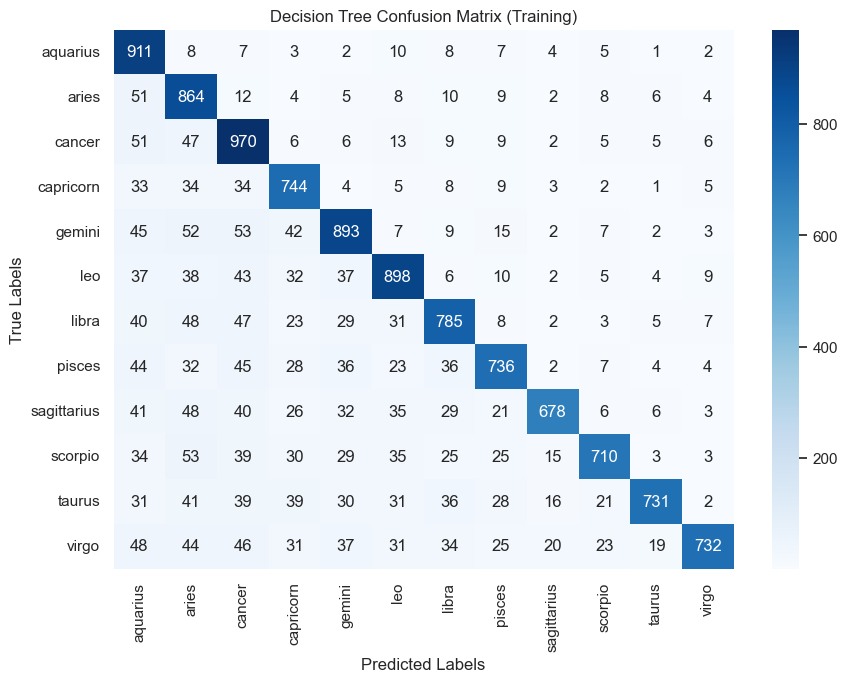

In [16]:
cart_cm = confusion_matrix(y_train, cart_train_pred)
cart_labels = cart_model.classes_
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cart_cm, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Decision Tree Confusion Matrix (Training)')
ax.xaxis.set_ticklabels(cart_labels, rotation=90)
ax.yaxis.set_ticklabels(cart_labels, rotation=0)
plt.show()

- Perform a Cross-Validation with Decision Tree

In [17]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_results = cross_val_score(cart_model, X_train, y_train, cv=kfold, scoring='accuracy')
print("Decision Tree CV Accuracy Scores:", cv_results)
print("Mean CV Accuracy: {:.2f}% (± {:.2f}%)".format(cv_results.mean()*100, cv_results.std()*100))

Decision Tree CV Accuracy Scores: [0.08792545 0.08468395 0.08589951 0.09846029 0.08471828]
Mean CV Accuracy: 8.83% (± 0.52%)


- Also we could tune the Decision Tree depth:

In [18]:
cart_model20 = DecisionTreeClassifier(max_depth=20, random_state=0).fit(X_train, y_train)
cart_train_pred20 = cart_model20.predict(X_train)
print("\nDecision Tree (max_depth=20) Training Report:")
print(classification_report(y_train, cart_train_pred20))
cv_results20 = cross_val_score(cart_model20, X_train, y_train, cv=kfold, scoring='accuracy')
print("Tuned Decision Tree CV Accuracy Scores:", cv_results20)
print("Mean CV Accuracy (max_depth=20): {:.2f}%".format(cv_results20.mean()*100))


Decision Tree (max_depth=20) Training Report:
              precision    recall  f1-score   support

    aquarius       0.33      0.39      0.36       968
       aries       0.48      0.35      0.40       983
      cancer       0.31      0.38      0.34      1129
   capricorn       0.57      0.32      0.41       882
      gemini       0.54      0.34      0.42      1130
         leo       0.19      0.54      0.29      1121
       libra       0.34      0.32      0.33      1028
      pisces       0.28      0.34      0.31       997
 sagittarius       0.46      0.29      0.36       965
     scorpio       0.38      0.31      0.34      1001
      taurus       0.51      0.26      0.34      1045
       virgo       0.52      0.28      0.36      1090

    accuracy                           0.35     12339
   macro avg       0.41      0.34      0.36     12339
weighted avg       0.41      0.35      0.35     12339

Tuned Decision Tree CV Accuracy Scores: [0.08589951 0.09643436 0.08711507 0.08306321 0

### Step 7: Validation & Model Comparison

##### We can now go over the validation of our Models performed before

- Logistic Regression Validation

In [19]:
lr_val_pred = lr_model.predict(X_val)
print("Logistic Regression Validation Report:")
print(classification_report(y_val, lr_val_pred))

Logistic Regression Validation Report:
              precision    recall  f1-score   support

    aquarius       0.07      0.04      0.05       294
       aries       0.08      0.06      0.07       345
      cancer       0.09      0.20      0.12       328
   capricorn       0.13      0.04      0.07       315
      gemini       0.08      0.10      0.09       366
         leo       0.09      0.14      0.11       395
       libra       0.07      0.05      0.06       326
      pisces       0.11      0.09      0.10       337
 sagittarius       0.08      0.05      0.06       347
     scorpio       0.08      0.03      0.04       355
      taurus       0.08      0.08      0.08       345
       virgo       0.09      0.15      0.11       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



- KNN Validation

In [20]:
knn_val_pred = knn_model.predict(X_val)
print("KNN Validation Report:")
print(classification_report(y_val, knn_val_pred))

KNN Validation Report:
              precision    recall  f1-score   support

    aquarius       0.08      0.23      0.12       294
       aries       0.09      0.15      0.11       345
      cancer       0.10      0.19      0.13       328
   capricorn       0.06      0.07      0.07       315
      gemini       0.08      0.07      0.08       366
         leo       0.11      0.08      0.09       395
       libra       0.05      0.04      0.05       326
      pisces       0.05      0.03      0.04       337
 sagittarius       0.13      0.07      0.09       347
     scorpio       0.10      0.06      0.08       355
      taurus       0.11      0.05      0.07       345
       virgo       0.09      0.05      0.06       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



- Decision Tree Validation

In [21]:
cart_val_pred = cart_model.predict(X_val)
print("Decision Tree (Default) Validation Report:")
print(classification_report(y_val, cart_val_pred))

Decision Tree (Default) Validation Report:
              precision    recall  f1-score   support

    aquarius       0.09      0.14      0.11       294
       aries       0.07      0.08      0.07       345
      cancer       0.09      0.13      0.11       328
   capricorn       0.06      0.07      0.07       315
      gemini       0.09      0.09      0.09       366
         leo       0.10      0.09      0.10       395
       libra       0.10      0.09      0.09       326
      pisces       0.09      0.08      0.09       337
 sagittarius       0.11      0.08      0.09       347
     scorpio       0.08      0.06      0.07       355
      taurus       0.09      0.07      0.08       345
       virgo       0.07      0.05      0.06       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



- We can plot a confusion matrix for one of the models, for example, let´s do it for the KNN Model.

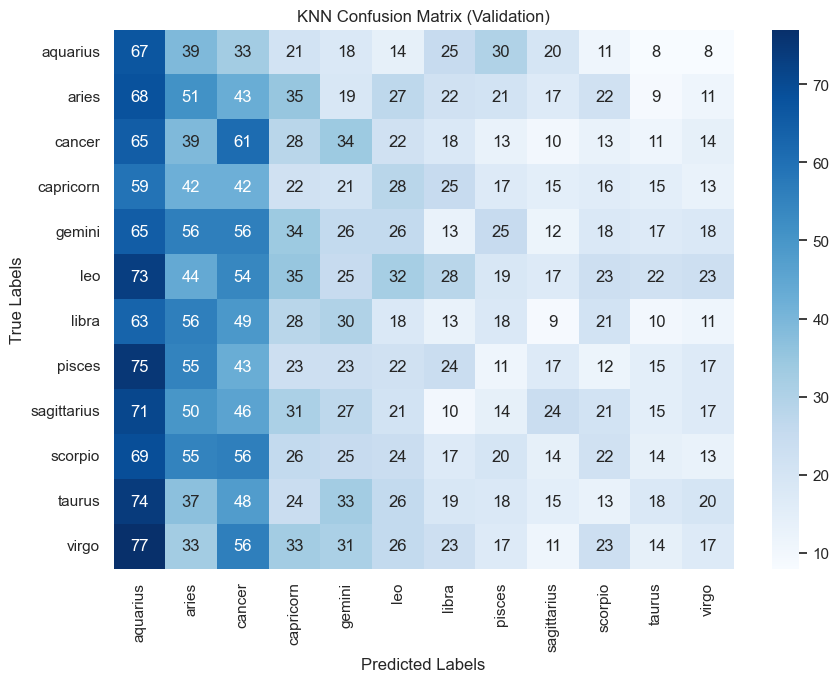

In [22]:
final_cm = confusion_matrix(y_val, knn_val_pred)
knn_labels = knn_model.classes_
plt.figure(figsize=(10, 7))
ax = sns.heatmap(final_cm, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('KNN Confusion Matrix (Validation)')
ax.xaxis.set_ticklabels(knn_labels, rotation=90)
ax.yaxis.set_ticklabels(knn_labels, rotation=0)
plt.show()

### Step 8: Conclusion & Insights

#### **Conclusion:**

In this project we:
- Explored the dating profiles dataset thoroughly using EDA, uncovering trends in age, height, income, and categorical features.
- Cleaned and engineered features (e.g., cleaned zodiac signs, religion) to better prepare the data for ML.
- Applied three different machine learning models to predict the cleaned zodiac sign.


#### **Insights:**
- The EDA revealed interesting demographic distributions (e.g., age and gender trends) which might be useful for further segmentation studies.
- Model evaluation shows that while all three models have their strengths, the overall performance varies. For instance, Logistic Regression and  decision Trees may handle high-dimensional dummy-encoded data differently.
- Cross-validation and confusion matrix analysis indicate areas where models are misclassifying certain classes. In our case, some zodiac signs like Cancer, Gemini, Leo, and Virgo were often predicted but not very accurately.


#### **Next Steps & Recommendations:**
- **Feature Engineering:** Consider extracting more information from the open-ended essay responses using natural language processing (NLP) techniques.
- **Hyperparameter Tuning:** Apply grid search or randomized search to further optimize model parameters.
- **Ensemble Methods:** Explore ensemble methods (e.g., Random Forests, Gradient Boosting) to potentially boost predictive performance.
- **Data Augmentation:** Look into additional data sources or synthetic data generation if certain classes remain underrepresented.